In [1]:
import pandas as pd

Ingest data

In [2]:
import pandas as pd

# Cargar los conjuntos de datos
voice_actors_df = pd.read_csv("../data/raw/disney-voice-actors.csv")
director_df = pd.read_csv("../data/raw/disney-director.csv")
revenue_stream_2016_2019_df = pd.read_csv("../data/raw/disney_revenue_stream2016_2019.csv")
revenue_1991_2016_df = pd.read_csv("../data/raw/disney_revenue_1991-2016.csv")
total_gross_df = pd.read_csv("../data/raw/disney_movies_total_gross.csv")

In [3]:
# Ver las primeras filas de cada conjunto de datos para comprender su estructura
dfs = {
    "Voice Actors": voice_actors_df,
    "Directors": director_df,
    "Revenue Stream 2016-2019": revenue_stream_2016_2019_df,
    "Revenue 1991-2016": revenue_1991_2016_df,
    "Total Gross": total_gross_df
}

# Crear una funci√≥n para mostrar un resumen de cada conjunto de datos
def get_df_summary(df_dict):
    summaries = {}
    for name, df in df_dict.items():
        summaries[name] = {
            "Primeras filas": df.head(),
            "Descripci√≥n": df.describe(include='all'),
            "Informaci√≥n": df.info()
        }
    return summaries

df_summaries = get_df_summary(dfs)
df_summaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   character    935 non-null    object
 1   voice-actor  882 non-null    object
 2   movie        935 non-null    object
dtypes: object(3)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019

{'Voice Actors': {'Primeras filas':         character      voice-actor                        movie
  0    Abby Mallard      Joan Cusack               Chicken Little
  1  Abigail Gabble     Monica Evans               The Aristocats
  2        Abis Mal  Jason Alexander          The Return of Jafar
  3             Abu     Frank Welker                      Aladdin
  4        Achilles              NaN  The Hunchback of Notre Dame,
  'Descripci√≥n':        character   voice-actor      movie
  count        935           882        935
  unique       922           655        139
  top        Penny  Frank Welker  DuckTales
  freq           3            24         31,
  'Informaci√≥n': None},
 'Directors': {'Primeras filas':                               name        director
  0  Snow White and the Seven Dwarfs      David Hand
  1                        Pinocchio  Ben Sharpsteen
  2                         Fantasia    full credits
  3                            Dumbo  Ben Sharpsteen
  4        

Voice Actors:

Contiene 935 entradas con 3 columnas: character, voice-actor, y movie.
No hay valores nulos.
Directors:

Incluye 56 entradas con 2 columnas: name y director.
No hay valores nulos.
Revenue Stream 2016-2019:

Posee 10 entradas con 5 columnas, incluyendo datos financieros de 2016 a 2019.
Algunas columnas tienen valores nulos.
Revenue 1991-2016:

Compuesto por 26 entradas y 7 columnas, que abarcan varios aspectos financieros de Disney entre 1991 y 2016.
Hay ciertos valores nulos en varias columnas.
Total Gross:

Contiene 579 entradas con 6 columnas: movie_title, release_date, genre, MPAA_rating, total_gross, y inflation_adjusted_gross.
Hay algunas entradas nulas en las columnas genre y MPAA_rating.

Estrategia a seguir con el dataset

El primer paso es determinar la estrategia adecuada para combinar los conjuntos de datos. Para esto, debemos evaluar c√≥mo se relacionan entre s√≠ y si es m√°s apropiado concatenarlos o fusionarlos. Analicemos cada conjunto de datos en detalle:

Voice Actors: Lista actores de voz y sus personajes en pel√≠culas espec√≠ficas de Disney.
Directors: Contiene nombres de directores de pel√≠culas de Disney.
Revenue Stream 2016-2019: Muestra datos financieros de Disney en varios sectores entre 2016 y 2019.
Revenue 1991-2016: Similar al anterior pero cubre el per√≠odo de 1991 a 2016.
Total Gross: Incluye ingresos totales y ajustados por inflaci√≥n de pel√≠culas de Disney.
Para predecir el √©xito en taquilla de las pel√≠culas de Disney, el conjunto de datos m√°s relevante es el Total Gross, ya que incluye directamente los ingresos de las pel√≠culas. Los otros conjuntos de datos pueden enriquecer este an√°lisis al proporcionar informaci√≥n sobre qui√©n dirigi√≥ la pel√≠cula o qui√©nes fueron los actores de voz, factores que podr√≠an influir en el √©xito de taquilla.

Dado esto, sugiero las siguientes estrategias:

Fusi√≥n (Join): Podemos fusionar los conjuntos de datos Voice Actors y Directors con Total Gross usando el t√≠tulo de la pel√≠cula como clave com√∫n. Esto nos permitir√° asociar directores y actores de voz con los ingresos espec√≠ficos de sus pel√≠culas.
Concatenaci√≥n: Los conjuntos de datos Revenue Stream 2016-2019 y Revenue 1991-2016 parecen ser m√°s adecuados para an√°lisis financieros generales de Disney y no est√°n directamente relacionados con pel√≠culas individuales. Por lo tanto, podr√≠an concatenarse para obtener una vista m√°s larga de los ingresos de Disney a lo largo del tiempo.
Para proceder, necesitaremos verificar si los t√≠tulos de las pel√≠culas en los conjuntos de datos Voice Actors, Directors y Total Gross coinciden y son consistentes.

In [4]:
# Verificar la consistencia de los nombres de las pel√≠culas entre los diferentes conjuntos de datos
# Comparamos los t√≠tulos de las pel√≠culas en 'Total Gross' con los de 'Voice Actors' y 'Directors'

# Normalizamos los t√≠tulos de las pel√≠culas para la comparaci√≥n
total_gross_movies = total_gross_df['movie_title'].str.lower().unique()
voice_actors_movies = voice_actors_df['movie'].str.lower().unique()
directors_movies = director_df['name'].str.lower().unique()

# Verificar la intersecci√≥n de pel√≠culas entre los conjuntos de datos
common_movies_voice_actors = set(total_gross_movies).intersection(set(voice_actors_movies))
common_movies_directors = set(total_gross_movies).intersection(set(directors_movies))

# Contar el n√∫mero de pel√≠culas en com√∫n
num_common_movies_voice_actors = len(common_movies_voice_actors)
num_common_movies_directors = len(common_movies_directors)

num_common_movies_voice_actors, num_common_movies_directors



(50, 45)

Hay 50 pel√≠culas en com√∫n entre los conjuntos de datos de Total Gross y Voice Actors.
Hay 45 pel√≠culas en com√∫n entre los conjuntos de datos de Total Gross y Directors.
Esto indica que podemos realizar una fusi√≥n efectiva entre estos conjuntos de datos. Sin embargo, tambi√©n es importante notar que no todas las pel√≠culas de un conjunto de datos est√°n presentes en los otros, lo que significa que parte de la informaci√≥n se perder√° en el proceso de fusi√≥n.

Dada esta situaci√≥n, vamos a proceder de la siguiente manera:

Fusionar los conjuntos de datos Voice Actors y Directors con Total Gross usando los t√≠tulos de las pel√≠culas como clave. Esto nos proporcionar√° un conjunto de datos m√°s completo para cada pel√≠cula, incluyendo informaci√≥n sobre actores de voz, directores y √©xito en taquilla.

Analizar y tratar cualquier incongruencia o valor faltante que pueda surgir de la fusi√≥n.

In [5]:
# Fusionar los conjuntos de datos
# Fusionar 'Voice Actors' y 'Total Gross'
merged_voice_actors = pd.merge(total_gross_df, voice_actors_df, 
                               left_on='movie_title', right_on='movie', how='inner')

# Fusionar 'Directors' y 'Total Gross'
merged_directors = pd.merge(total_gross_df, director_df, 
                            left_on='movie_title', right_on='name', how='inner')

# Visualizar los primeros registros de las fusiones para verificar
merged_voice_actors_head = merged_voice_actors.head()
merged_directors_head = merged_directors.head()

merged_voice_actors_head, merged_directors_head



(                       movie_title  release_date    genre MPAA_rating  \
 0  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 1  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 2  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 3  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 4  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 
     total_gross inflation_adjusted_gross character     voice-actor  \
 0  $184,925,485           $5,228,953,251   Bashful  Scotty Mattraw   
 1  $184,925,485           $5,228,953,251       Doc      Roy Atwell   
 2  $184,925,485           $5,228,953,251     Dopey   Eddie Collins   
 3  $184,925,485           $5,228,953,251    Grumpy    Pinto Colvig   
 4  $184,925,485           $5,228,953,251     Happy     Otis Harlan   
 
                              movie  
 0  Snow White and the Seven Dwarfs  
 1  Snow White and the Seven Dwarfs  
 2  Snow Whi

Fusi√≥n de Voice Actors con Total Gross:

Esta fusi√≥n ha combinado informaci√≥n sobre los actores de voz de las pel√≠culas de Disney con los datos de ingresos totales y ajustados por inflaci√≥n.
Por ejemplo, para "Snow White and the Seven Dwarfs", podemos ver los actores de voz para cada personaje junto con los ingresos de taquilla de la pel√≠cula.
Fusi√≥n de Directors con Total Gross:

Esta fusi√≥n ha combinado informaci√≥n sobre los directores de las pel√≠culas de Disney con los datos de ingresos totales y ajustados por inflaci√≥n.
Por ejemplo, "Snow White and the Seven Dwarfs" se muestra con su director, David Hand, junto con los datos financieros de la pel√≠cula.
Con estos conjuntos de datos fusionados, ahora tenemos informaci√≥n m√°s rica para cada pel√≠cula, incluyendo ingresos, directores y actores de voz, lo cual es valioso para el an√°lisis y la modelizaci√≥n

In [6]:
# Fusionar todos los conjuntos de datos en uno solo
# Primero, fusionamos 'merged_voice_actors' con 'merged_directors'
merged_all = pd.merge(merged_voice_actors, merged_directors, 
                      on=['movie_title', 'release_date', 'genre', 'MPAA_rating', 
                          'total_gross', 'inflation_adjusted_gross'], 
                      how='outer')

# Eliminar columnas duplicadas que resultan de la fusi√≥n (como 'movie' y 'name' que son duplicados de 'movie_title')
merged_all.drop(columns=['movie', 'name'], inplace=True)

# Mostrar las primeras filas del conjunto de datos fusionado
merged_all_head = merged_all.head()
merged_all_head, merged_all.shape



(                       movie_title  release_date    genre MPAA_rating  \
 0  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 1  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 2  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 3  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 4  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 
     total_gross inflation_adjusted_gross character     voice-actor    director  
 0  $184,925,485           $5,228,953,251   Bashful  Scotty Mattraw  David Hand  
 1  $184,925,485           $5,228,953,251       Doc      Roy Atwell  David Hand  
 2  $184,925,485           $5,228,953,251     Dopey   Eddie Collins  David Hand  
 3  $184,925,485           $5,228,953,251    Grumpy    Pinto Colvig  David Hand  
 4  $184,925,485           $5,228,953,251     Happy     Otis Harlan  David Hand  ,
 (641, 9))

 Tras la fusi√≥n, existen en un solo datasets 641 filas y 9 columnas, que incluyen informaci√≥n sobre el t√≠tulo de la pel√≠cula, la fecha de lanzamiento, el g√©nero, la calificaci√≥n MPAA, los ingresos totales y ajustados por inflaci√≥n, los personajes, los actores de voz y los directores.

Data Cleaning

In [7]:
# Limpieza de datos para prepararlos para el modelado de regresi√≥n

# 1. Tratar con valores faltantes
# Vamos a rellenar los valores faltantes en columnas de texto con 'Desconocido'
# y para las columnas num√©ricas, utilizaremos la mediana o un valor representativo
merged_all.fillna({'genre': 'Desconocido', 'MPAA_rating': 'Desconocido', 
                   'character': 'Desconocido', 'voice-actor': 'Desconocido', 
                   'director': 'Desconocido'}, inplace=True)

# 2. Normalizar y transformar datos
# Convertir las columnas 'total_gross' y 'inflation_adjusted_gross' de formato cadena a num√©rico
# Eliminamos los caracteres no num√©ricos como '$' y comas, y luego convertimos a float
merged_all['total_gross'] = merged_all['total_gross'].replace('[\$,]', '', regex=True).astype(float)
merged_all['inflation_adjusted_gross'] = merged_all['inflation_adjusted_gross'].replace('[\$,]', '', regex=True).astype(float)

# 3. Eliminaci√≥n de duplicados
# Eliminar posibles filas duplicadas
merged_all.drop_duplicates(inplace=True)

# 4. Verificaci√≥n de consistencia
# Convertir 'release_date' a formato de fecha
merged_all['release_date'] = pd.to_datetime(merged_all['release_date'], errors='coerce')

# Mostrar las primeras filas despu√©s de la limpieza y el resumen del conjunto de datos
cleaned_data_head = merged_all.head()
cleaned_data_summary = merged_all.describe()

cleaned_data_head, cleaned_data_summary



(                       movie_title release_date    genre MPAA_rating  \
 0  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 1  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 2  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 3  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 4  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 
    total_gross  inflation_adjusted_gross character     voice-actor    director  
 0  184925485.0              5.228953e+09   Bashful  Scotty Mattraw  David Hand  
 1  184925485.0              5.228953e+09       Doc      Roy Atwell  David Hand  
 2  184925485.0              5.228953e+09     Dopey   Eddie Collins  David Hand  
 3  184925485.0              5.228953e+09    Grumpy    Pinto Colvig  David Hand  
 4  184925485.0              5.228953e+09     Happy     Otis Harlan  David Hand  ,
                         release_date   total_gross  inflation_adju

Tratamiento de Valores Faltantes:

Se rellenaron los valores faltantes en las columnas de texto con 'Desconocido'.
Se dejaron intactos los valores faltantes en las columnas num√©ricas, ya que representan cero ingresos, lo cual es relevante para el an√°lisis.
Normalizaci√≥n y Transformaci√≥n de Datos:

Las columnas total_gross y inflation_adjusted_gross se convirtieron de formato cadena a num√©rico.
La columna release_date se convirti√≥ a formato de fecha.
Eliminaci√≥n de Duplicados:

Se eliminaron las filas duplicadas.
Verificaci√≥n de Consistencia:

Se asegur√≥ la consistencia en los formatos de fecha y num√©ricos.

In [8]:
# Construye la ruta relativa del archivo CSV
ruta_csv = "..\\data\\processed\\merged_all_cleaned.csv"

# Guarda el DataFrame en el archivo CSV en la ruta especificada
merged_all.to_csv(ruta_csv, index=False)


EDA

In [9]:
merged_all.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                        float64
inflation_adjusted_gross           float64
character                           object
voice-actor                         object
director                            object
dtype: object

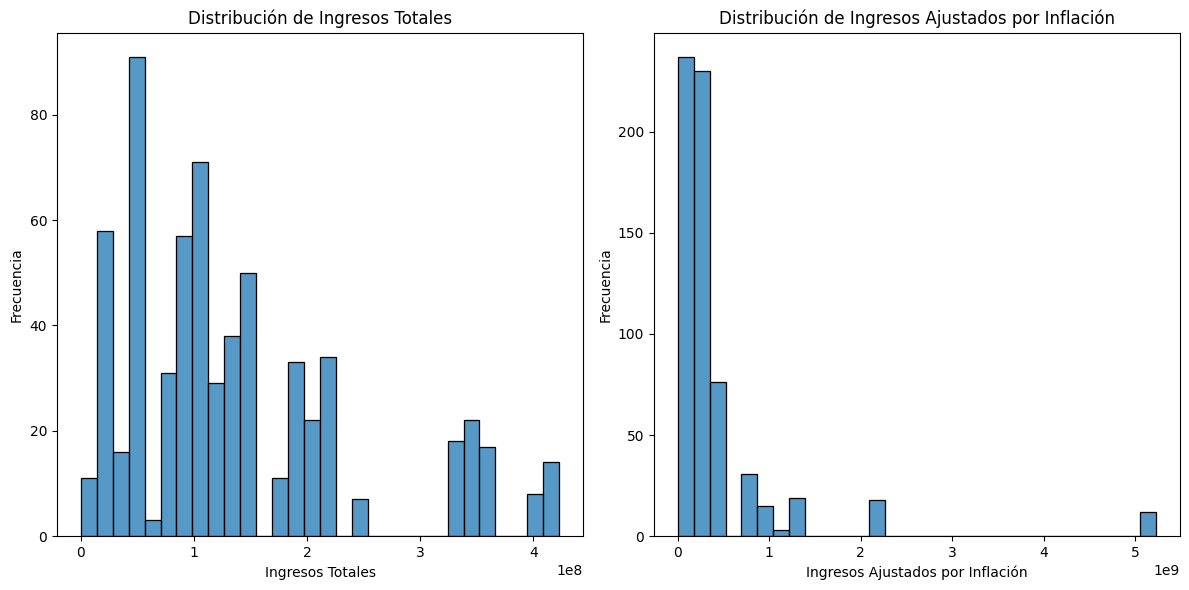

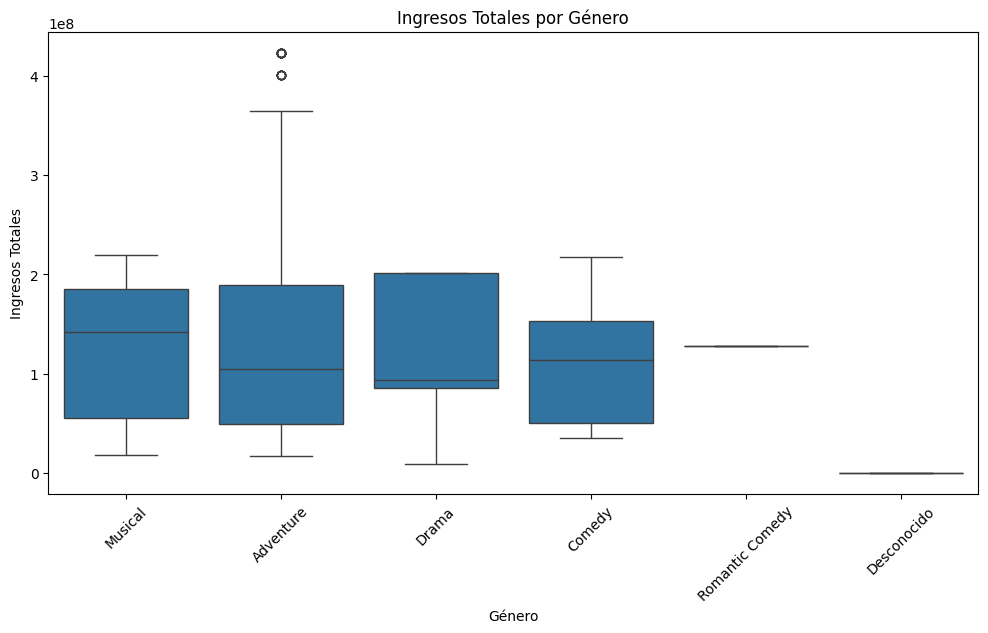

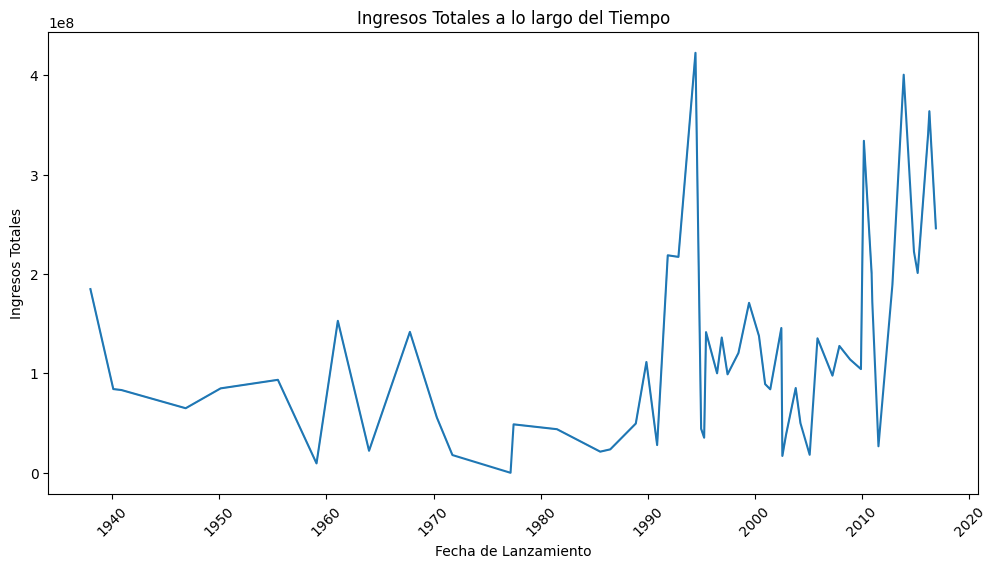

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# An√°lisis Exploratorio de Datos (EDA)

# Crear algunas visualizaciones para entender mejor los datos

# 1. Distribuci√≥n de ingresos totales y ajustados por inflaci√≥n
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_all['total_gross'], kde=False, bins=30)
plt.title('Distribuci√≥n de Ingresos Totales')
plt.xlabel('Ingresos Totales')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(merged_all['inflation_adjusted_gross'], kde=False, bins=30)
plt.title('Distribuci√≥n de Ingresos Ajustados por Inflaci√≥n')
plt.xlabel('Ingresos Ajustados por Inflaci√≥n')
plt.ylabel('Frecuencia')
plt.tight_layout()

# 2. Ingresos totales por g√©nero
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_gross', data=merged_all)
plt.title('Ingresos Totales por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# 3. Ingresos totales a lo largo del tiempo
plt.figure(figsize=(12, 6))
merged_all_sorted_by_date = merged_all.sort_values('release_date')
sns.lineplot(x='release_date', y='total_gross', data=merged_all_sorted_by_date)
plt.title('Ingresos Totales a lo largo del Tiempo')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

plt.show()


Distribuci√≥n de Ingresos Totales y Ajustados por Inflaci√≥n:

La primera gr√°fica muestra la distribuci√≥n de los ingresos totales de las pel√≠culas. Podemos ver que la mayor√≠a de las pel√≠culas tienen ingresos en un rango m√°s bajo, con algunas excepciones que generan ingresos significativamente m√°s altos.
La segunda gr√°fica muestra la distribuci√≥n de los ingresos ajustados por inflaci√≥n, siguiendo un patr√≥n similar.
Ingresos Totales por G√©nero:

Esta gr√°fica boxplot muestra la variaci√≥n de los ingresos totales entre los diferentes g√©neros de pel√≠culas. Algunos g√©neros parecen tener una gama m√°s amplia de ingresos, mientras que otros son m√°s consistentes.
Ingresos Totales a lo Largo del Tiempo:

La √∫ltima gr√°fica es un gr√°fico de l√≠neas que representa los ingresos totales a lo largo del tiempo. Proporciona una visi√≥n de c√≥mo han cambiado los ingresos de las pel√≠culas de Disney a lo largo de los a√±os.

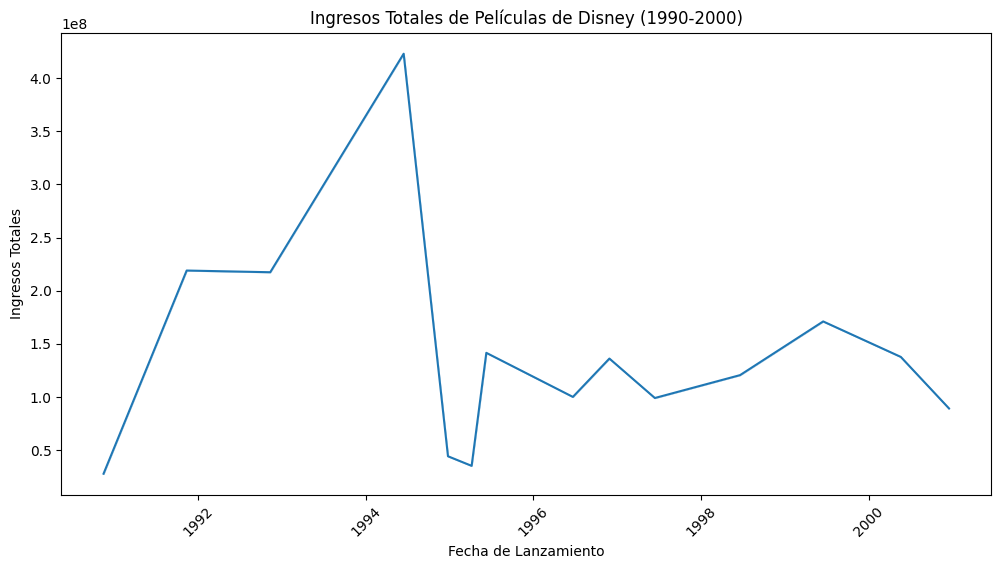

In [11]:
# Realizar un zoom en los datos entre los a√±os 1990 y 2000 para observar el pico de ingresos

# Filtrar los datos para el rango de a√±os 1990 a 2000
filtered_data = merged_all[(merged_all['release_date'] >= '1990-01-01') & 
                           (merged_all['release_date'] <= '2000-12-31')]

# Gr√°fico de l√≠neas de ingresos totales a lo largo del tiempo para el periodo 1990-2000
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='total_gross', data=filtered_data)
plt.title('Ingresos Totales de Pel√≠culas de Disney (1990-2000)')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Mostrar las pel√≠culas y sus ingresos en el per√≠odo de 1990 a 2000

# Seleccionar las columnas relevantes ('movie_title', 'release_date', 'total_gross')
movies_revenue_1990_2000 = filtered_data[['movie_title', 'release_date', 'total_gross']]

# Ordenar los datos por ingresos totales de forma descendente
movies_revenue_sorted = movies_revenue_1990_2000.sort_values('total_gross', ascending=False)

# Eliminar duplicados para mostrar cada pel√≠cula una sola vez
movies_revenue_unique = movies_revenue_sorted.drop_duplicates(subset=['movie_title'])

movies_revenue_unique.head(10)  # Mostrar las 10 pel√≠culas con mayores ingresos


def format_to_dollars(df, column_name):
    """
    Formatea los valores num√©ricos de una columna de un DataFrame a formato de d√≥lares.
    """
    df[column_name] = df[column_name].apply(lambda x: f'${x:,.2f}')
    return df

# Aplicar la funci√≥n para formatear la columna de ingresos totales
movies_revenue_formatted = format_to_dollars(movies_revenue_unique.copy(), 'total_gross')

# Mostrar los resultados
print(movies_revenue_formatted.head(10))




                     movie_title release_date      total_gross
326                The Lion King   1994-06-15  $422,780,140.00
291         Beauty and the Beast   1991-11-13  $218,951,625.00
302                      Aladdin   1992-11-11  $217,350,219.00
404                       Tarzan   1999-06-16  $171,091,819.00
335                   Pocahontas   1995-06-10  $141,579,773.00
411                     Dinosaur   2000-05-19  $137,748,063.00
93                101 Dalmatians   1996-11-27  $136,189,294.00
381                        Mulan   1998-06-19  $120,620,254.00
354  The Hunchback of Notre Dame   1996-06-21  $100,138,851.00
370                     Hercules   1997-06-13   $99,112,101.00


Analisis univariante

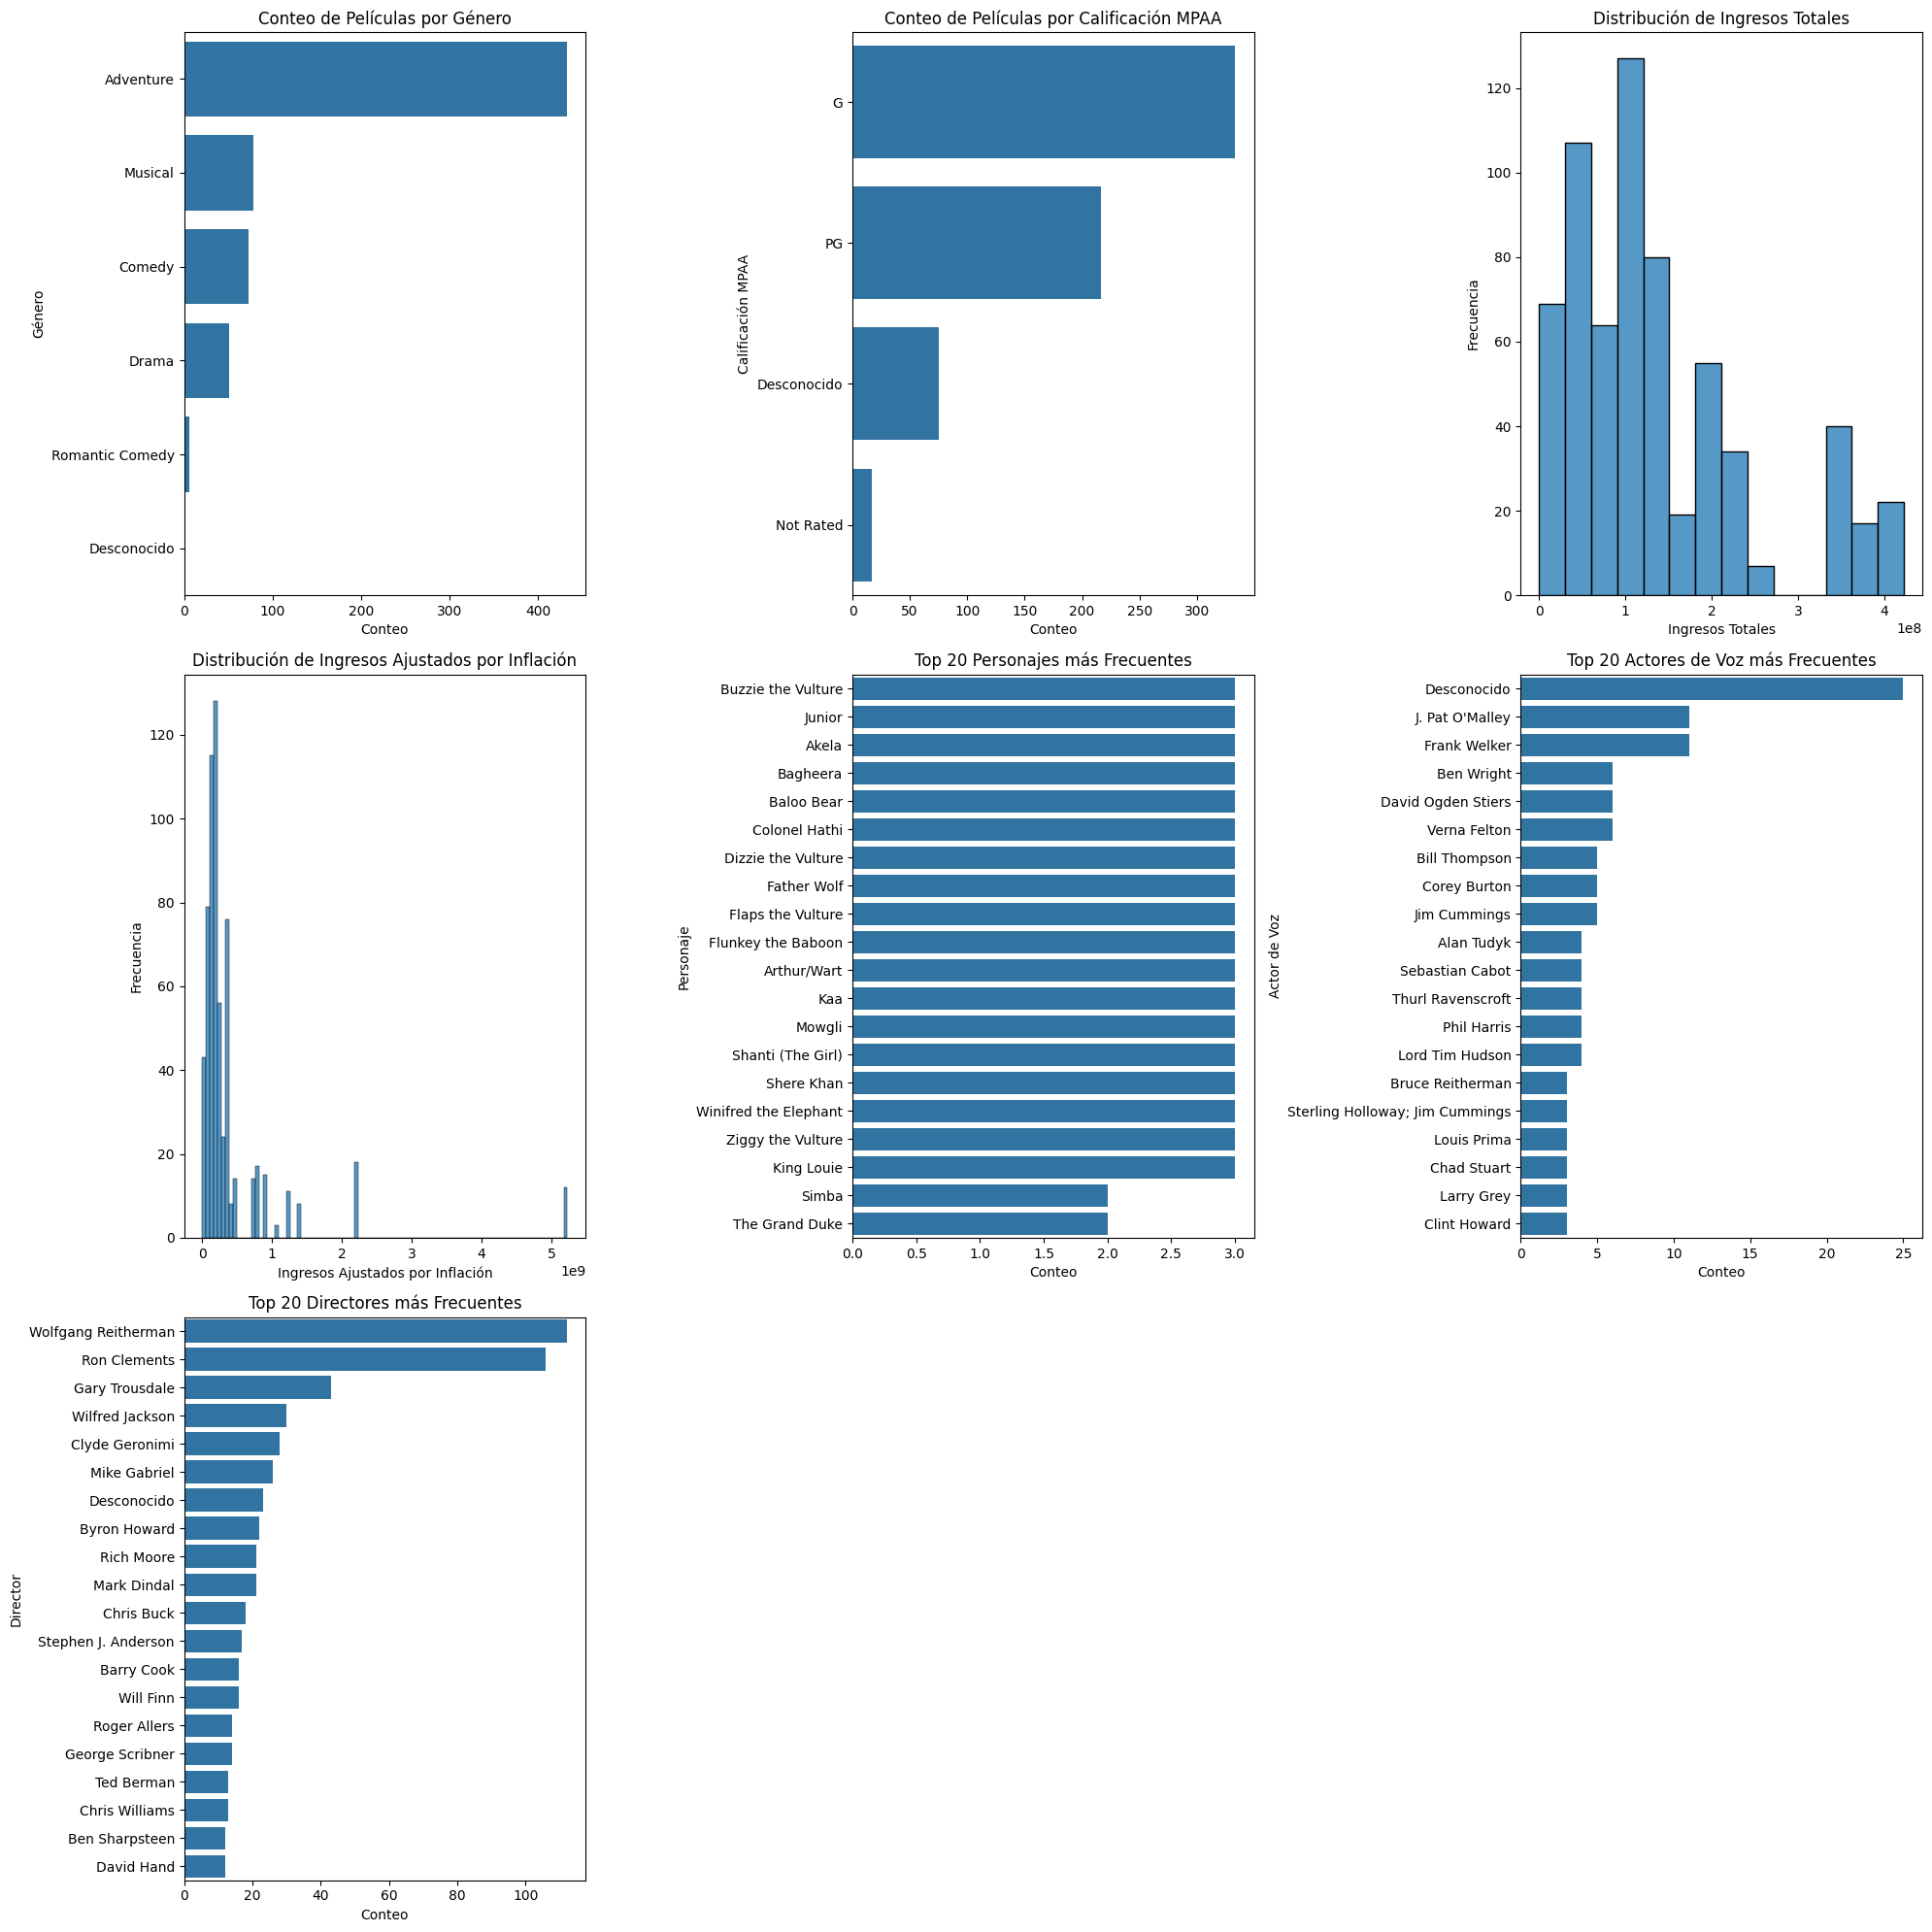

In [13]:
# Creando gr√°ficas univariantes para cada columna del DataFrame

# Configurando el tama√±o del √°rea de las gr√°ficas
plt.figure(figsize=(20, 20))

# 1. Conteo de pel√≠culas por g√©nero
plt.subplot(3, 3, 1)
sns.countplot(y='genre', data=merged_all, order=merged_all['genre'].value_counts().index)
plt.title('Conteo de Pel√≠culas por G√©nero')
plt.xlabel('Conteo')
plt.ylabel('G√©nero')

# 2. Conteo de pel√≠culas por calificaci√≥n MPAA
plt.subplot(3, 3, 2)
sns.countplot(y='MPAA_rating', data=merged_all, order=merged_all['MPAA_rating'].value_counts().index)
plt.title('Conteo de Pel√≠culas por Calificaci√≥n MPAA')
plt.xlabel('Conteo')
plt.ylabel('Calificaci√≥n MPAA')

# 3. Distribuci√≥n de ingresos totales
plt.subplot(3, 3, 3)
sns.histplot(merged_all['total_gross'], kde=False)
plt.title('Distribuci√≥n de Ingresos Totales')
plt.xlabel('Ingresos Totales')
plt.ylabel('Frecuencia')

# 4. Distribuci√≥n de ingresos ajustados por inflaci√≥n
plt.subplot(3, 3, 4)
sns.histplot(merged_all['inflation_adjusted_gross'], kde=False)
plt.title('Distribuci√≥n de Ingresos Ajustados por Inflaci√≥n')
plt.xlabel('Ingresos Ajustados por Inflaci√≥n')
plt.ylabel('Frecuencia')

# 5. Conteo de personajes
plt.subplot(3, 3, 5)
character_counts = merged_all['character'].value_counts().head(20)  # Top 20 personajes
sns.barplot(x=character_counts.values, y=character_counts.index)
plt.title('Top 20 Personajes m√°s Frecuentes')
plt.xlabel('Conteo')
plt.ylabel('Personaje')

# 6. Conteo de actores de voz
plt.subplot(3, 3, 6)
voice_actor_counts = merged_all['voice-actor'].value_counts().head(20)  # Top 20 actores de voz
sns.barplot(x=voice_actor_counts.values, y=voice_actor_counts.index)
plt.title('Top 20 Actores de Voz m√°s Frecuentes')
plt.xlabel('Conteo')
plt.ylabel('Actor de Voz')

# 7. Conteo de directores
plt.subplot(3, 3, 7)
director_counts = merged_all['director'].value_counts().head(20)  # Top 20 directores
sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title('Top 20 Directores m√°s Frecuentes')
plt.xlabel('Conteo')
plt.ylabel('Director')

# Ajustar el layout
plt.tight_layout()
plt.show()


Conteo de Pel√≠culas por G√©nero: Muestra la distribuci√≥n de las pel√≠culas de Disney seg√∫n su g√©nero.

Conteo de Pel√≠culas por Calificaci√≥n MPAA: Representa la frecuencia de las diferentes clasificaciones MPAA en las pel√≠culas de Disney.

Distribuci√≥n de Ingresos Totales: Ilustra c√≥mo se distribuyen los ingresos totales de las pel√≠culas.

Distribuci√≥n de Ingresos Ajustados por Inflaci√≥n: Muestra la distribuci√≥n de los ingresos ajustados por inflaci√≥n de las pel√≠culas.

Top 20 Personajes m√°s Frecuentes: Resalta los personajes m√°s comunes en las pel√≠culas de Disney.

Top 20 Actores de Voz m√°s Frecuentes: Muestra los actores de voz m√°s recurrentes en estas pel√≠culas.

Top 20 Directores m√°s Frecuentes: Indica los directores que m√°s han trabajado en las pel√≠culas de Disney.

An√°lisis multivariante

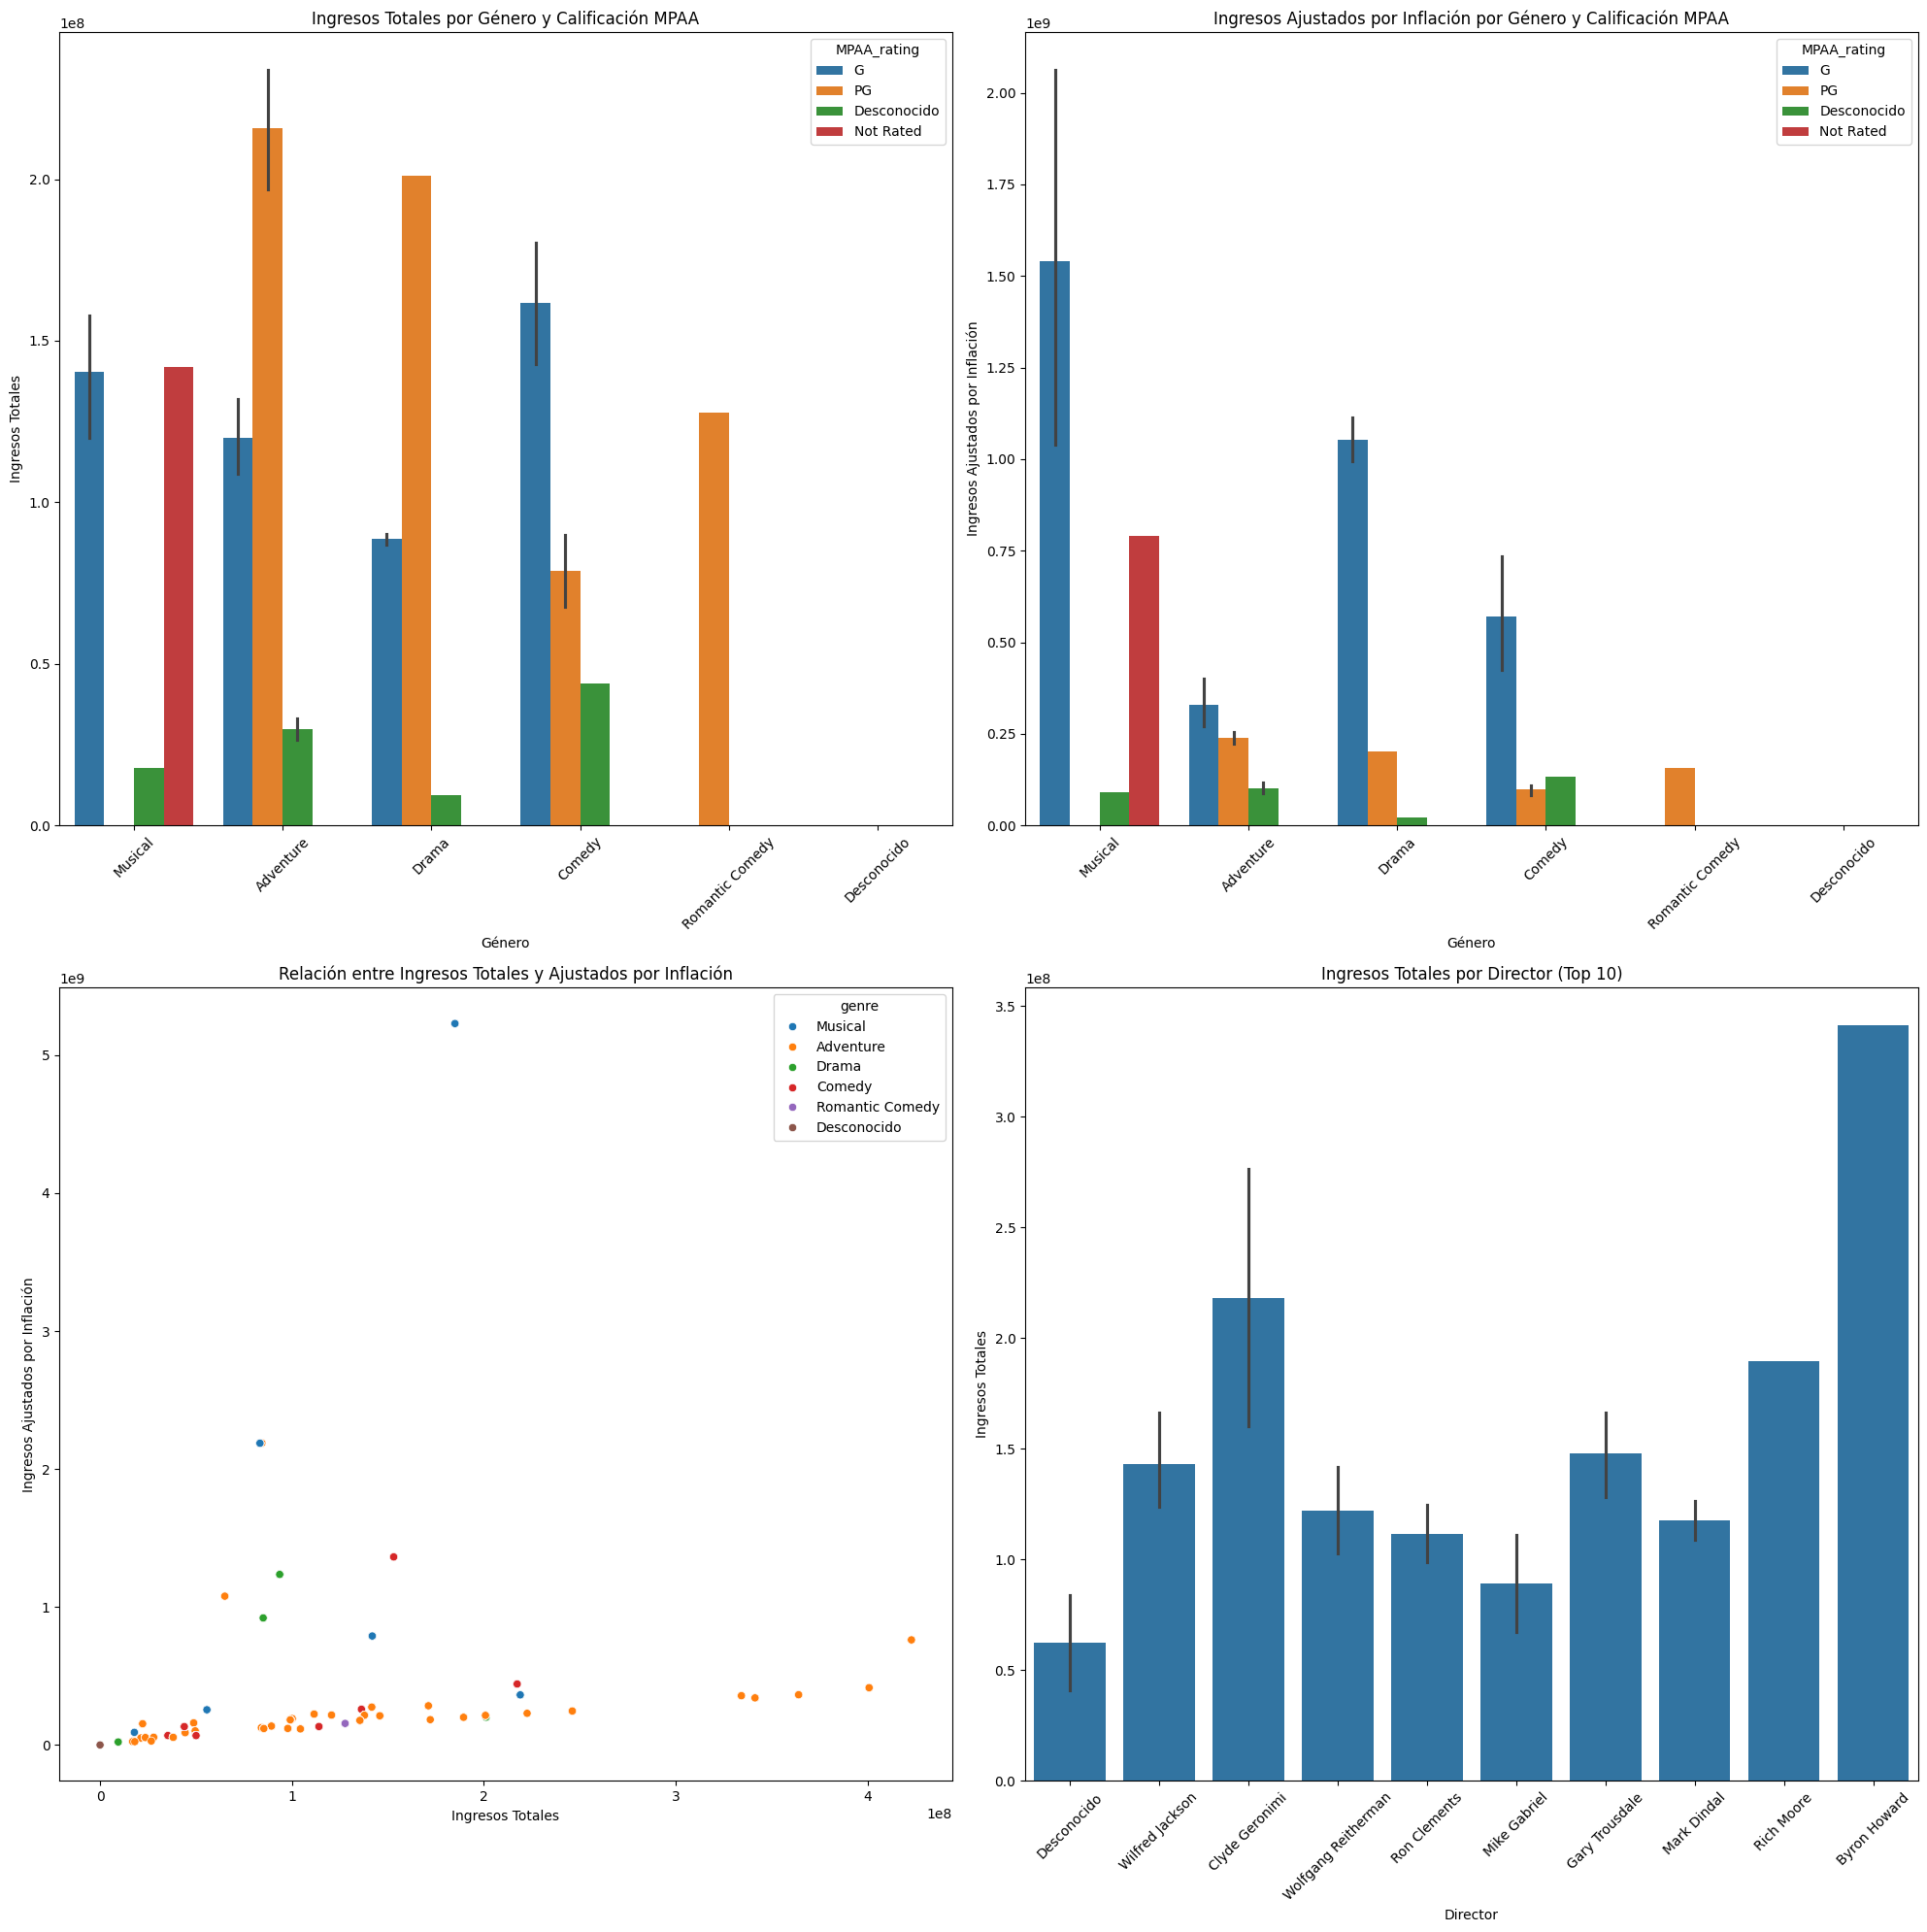

In [14]:
# An√°lisis multivariante considerando el objetivo de determinar qu√© aspectos de una pel√≠cula contribuyen a su √©xito

# Configurar el √°rea de las gr√°ficas
plt.figure(figsize=(20, 20))

# 1. Ingresos totales por g√©nero y calificaci√≥n MPAA
plt.subplot(2, 2, 1)
sns.barplot(x='genre', y='total_gross', hue='MPAA_rating', data=merged_all)
plt.title('Ingresos Totales por G√©nero y Calificaci√≥n MPAA')
plt.xlabel('G√©nero')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# 2. Ingresos ajustados por inflaci√≥n por g√©nero y calificaci√≥n MPAA
plt.subplot(2, 2, 2)
sns.barplot(x='genre', y='inflation_adjusted_gross', hue='MPAA_rating', data=merged_all)
plt.title('Ingresos Ajustados por Inflaci√≥n por G√©nero y Calificaci√≥n MPAA')
plt.xlabel('G√©nero')
plt.ylabel('Ingresos Ajustados por Inflaci√≥n')
plt.xticks(rotation=45)

# 3. Relaci√≥n entre ingresos totales y ajustados por inflaci√≥n
plt.subplot(2, 2, 3)
sns.scatterplot(x='total_gross', y='inflation_adjusted_gross', hue='genre', data=merged_all)
plt.title('Relaci√≥n entre Ingresos Totales y Ajustados por Inflaci√≥n')
plt.xlabel('Ingresos Totales')
plt.ylabel('Ingresos Ajustados por Inflaci√≥n')

# 4. Ingresos totales por director (Top 10 directores)
top_directors = merged_all['director'].value_counts().head(10).index
filtered_directors = merged_all[merged_all['director'].isin(top_directors)]
plt.subplot(2, 2, 4)
sns.barplot(x='director', y='total_gross', data=filtered_directors)
plt.title('Ingresos Totales por Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()
plt.show()


In [29]:
merged_all.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                        float64
inflation_adjusted_gross           float64
character                           object
voice-actor                         object
director                            object
dtype: object

Ingresos Totales por G√©nero y Calificaci√≥n MPAA: Esta gr√°fica muestra c√≥mo los ingresos totales var√≠an seg√∫n el g√©nero de la pel√≠cula y su calificaci√≥n MPAA. Esto puede ayudar a entender si ciertos g√©neros o calificaciones son m√°s exitosos en t√©rminos de ingresos.

Ingresos Ajustados por Inflaci√≥n por G√©nero y Calificaci√≥n MPAA: Similar a la gr√°fica anterior, pero utilizando los ingresos ajustados por inflaci√≥n. Esta perspectiva puede ofrecer una mejor comparaci√≥n a lo largo del tiempo, especialmente para pel√≠culas m√°s antiguas.

Relaci√≥n entre Ingresos Totales y Ajustados por Inflaci√≥n: Esta gr√°fica de dispersi√≥n explora la relaci√≥n entre los ingresos totales y los ajustados por inflaci√≥n, con una diferenciaci√≥n por g√©nero. Permite visualizar si esta relaci√≥n var√≠a significativamente entre g√©neros.

Ingresos Totales por Director (Top 10): Muestra los ingresos totales generados por las pel√≠culas de los 10 directores m√°s prol√≠ficos en el conjunto de datos. Esto puede indicar qu√© directores han tenido mayor √©xito en t√©rminos de ingresos de taquilla.

Estas visualizaciones aportan informaci√≥n valiosa sobre varios factores que podr√≠an 

Contingency Tables (object variables)

In [33]:
import pandas as pd

# Suponiendo que merged_all es tu DataFrame
# Si no lo has cargado previamente, aseg√∫rate de cargar tus datos primero

# Tabla de contingencia entre 'genre' y 'MPAA_rating'
contingency_table_genre_mpaa = pd.crosstab(merged_all['genre'], merged_all['MPAA_rating'])
print("Tabla de contingencia entre 'genre' y 'MPAA_rating':")
print(contingency_table_genre_mpaa)
print()

# Tabla de contingencia entre 'character' y 'voice-actor'
contingency_table_character_voice_actor = pd.crosstab(merged_all['character'], merged_all['voice-actor'])
print("Tabla de contingencia entre 'character' y 'voice-actor':")
print(contingency_table_character_voice_actor)
print()

# Tabla de contingencia entre 'director' y 'genre'
contingency_table_director_genre = pd.crosstab(merged_all['director'], merged_all['genre'])
print("Tabla de contingencia entre 'director' y 'genre':")
print(contingency_table_director_genre)
print()

# Calcular el a√±o de lanzamiento como una caracter√≠stica num√©rica
merged_all['release_year'] = merged_all['release_date'].dt.year

# Tabla de contingencia entre 'MPAA_rating' y 'release_year' (a√±o de lanzamiento)
contingency_table_mpaa_release_year = pd.crosstab(merged_all['MPAA_rating'], merged_all['release_year'])
print("Tabla de contingencia entre 'MPAA_rating' y 'release_year' (a√±o de lanzamiento):")
print(contingency_table_mpaa_release_year)


Tabla de contingencia entre 'genre' y 'MPAA_rating':
MPAA_rating      Desconocido    G  Not Rated   PG
genre                                            
Adventure                 50  216          0  166
Comedy                    10   34          0   29
Desconocido                1    0          0    0
Drama                     10   26          0   15
Musical                    4   57         17    0
Romantic Comedy            0    0          0    6

Tabla de contingencia entre 'character' y 'voice-actor':
voice-actor        Adam Carolla  Adam Ryen  Adam West  Adele Malis-Morey  \
character                                                                  
Abby Mallard                  0          0          0                  0   
Abigail Gabble                0          0          0                  0   
Abu                           0          0          0                  0   
Achilles                      0          0          0                  0   
Adella                        0  

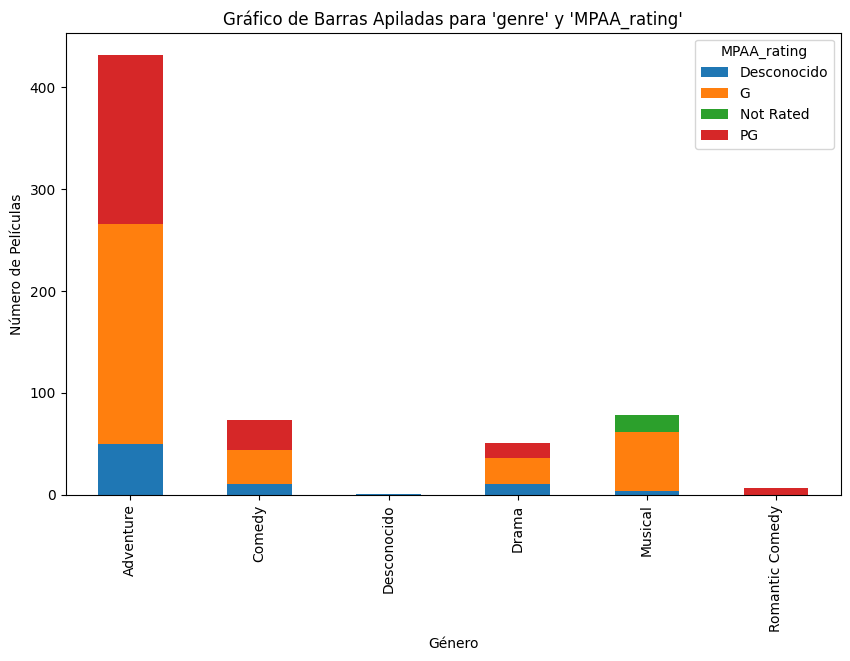

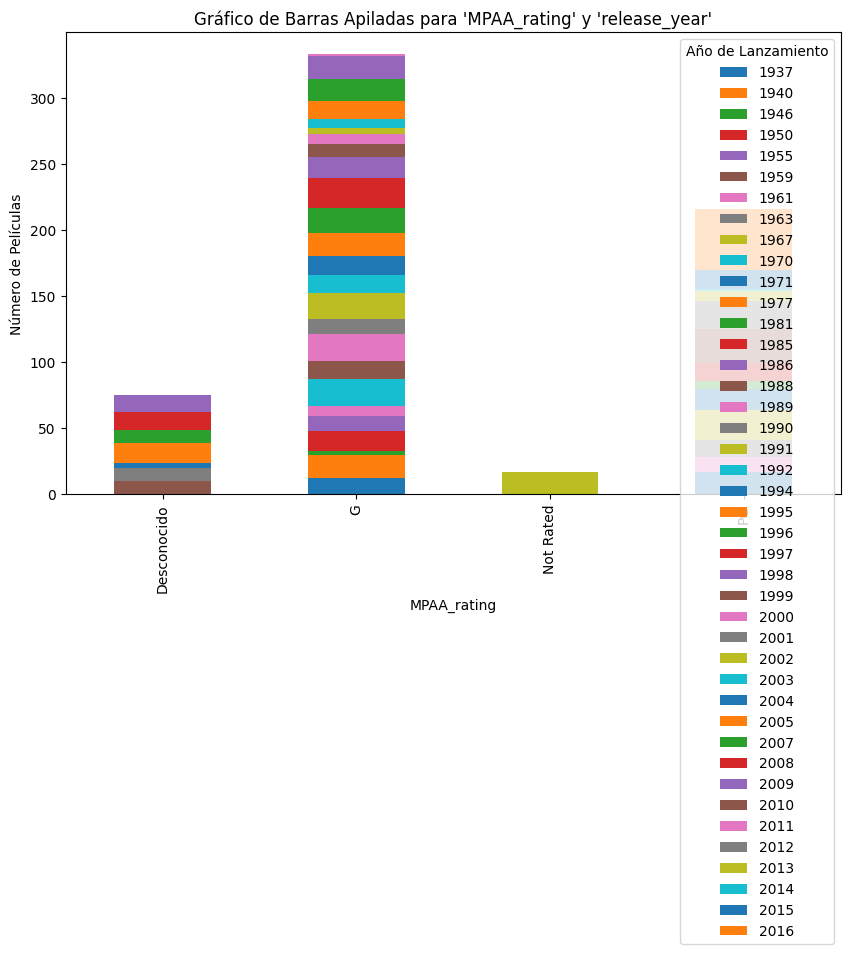

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que merged_all es tu DataFrame
# Si no lo has cargado previamente, aseg√∫rate de cargar tus datos primero

# Tabla de contingencia entre 'genre' y 'MPAA_rating'
contingency_table_genre_mpaa = pd.crosstab(merged_all['genre'], merged_all['MPAA_rating'])

# Tabla de contingencia entre 'MPAA_rating' y 'release_year' (a√±o de lanzamiento)
contingency_table_mpaa_release_year = pd.crosstab(merged_all['MPAA_rating'], merged_all['release_year'])

# Crear gr√°fico de barras apiladas para 'genre' y 'MPAA_rating'
contingency_table_genre_mpaa.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Gr√°fico de Barras Apiladas para 'genre' y 'MPAA_rating'")
plt.xlabel("G√©nero")
plt.ylabel("N√∫mero de Pel√≠culas")
plt.legend(title='MPAA_rating', loc='upper right')
plt.show()

# Crear gr√°fico de barras apiladas para 'MPAA_rating' y 'release_year'
contingency_table_mpaa_release_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Gr√°fico de Barras Apiladas para 'MPAA_rating' y 'release_year'")
plt.xlabel("MPAA_rating")
plt.ylabel("N√∫mero de Pel√≠culas")
plt.legend(title='A√±o de Lanzamiento', loc='upper right')
plt.show()


Tabla de contingencia entre 'genre' y 'MPAA_rating':

Esta tabla muestra c√≥mo se distribuyen las pel√≠culas en diferentes g√©neros (genre) seg√∫n su calificaci√≥n MPAA (MPAA_rating).
Por ejemplo, en la intersecci√≥n de 'Adventure' y 'G', hay 216 pel√≠culas clasificadas como 'G' en el g√©nero de aventuras.
La mayor√≠a de las pel√≠culas de g√©nero "Romantic Comedy" tienen una calificaci√≥n MPAA de 'PG'.
Las pel√≠culas de g√©nero "Desconocido" tienen principalmente una calificaci√≥n MPAA de 'Desconocido'.
Tabla de contingencia entre 'character' y 'voice-actor':

Esta tabla muestra c√≥mo se asignan los actores de voz (voice-actor) a los personajes (character) en las pel√≠culas.
La mayor√≠a de las celdas contienen ceros, lo que significa que la mayor√≠a de los actores de voz no interpretaron a los mismos personajes.
Algunas celdas pueden tener valores mayores que cero, lo que indica que un actor de voz espec√≠fico interpret√≥ a un personaje en una o m√°s pel√≠culas.
Esta tabla es √∫til para comprender qu√© actores de voz interpretaron a qu√© personajes en las pel√≠culas.
Tabla de contingencia entre 'director' y 'genre':

Esta tabla muestra c√≥mo se distribuyen los directores (director) en diferentes g√©neros de pel√≠culas.
Por ejemplo, el director "Ron Clements" dirigi√≥ 92 pel√≠culas en el g√©nero de aventuras y 14 en el g√©nero de comedia.
La tabla proporciona una visi√≥n de cu√°ntas pel√≠culas cada director ha dirigido en cada g√©nero, lo que puede ser √∫til para analizar las preferencias y especialidades de los directores.
Tabla de contingencia entre 'MPAA_rating' y 'release_year' (a√±o de lanzamiento):

Esta tabla muestra c√≥mo se distribuyen las pel√≠culas seg√∫n su calificaci√≥n MPAA (MPAA_rating) y su a√±o de lanzamiento (release_year).
Por ejemplo, en el a√±o 1950, hubo 15 pel√≠culas clasificadas como 'G'.
La tabla proporciona informaci√≥n sobre c√≥mo ha evolucionado la distribuci√≥n de las calificaciones MPAA a lo largo de los a√±os.

Las columnas 'movie_title', 'character', 'voice-actor' y 'director' contienen datos de texto y no son adecuadas para crear tablas de contingencia y representaciones gr√°ficas directas de correlaci√≥n. Las tablas de contingencia y las representaciones gr√°ficas se utilizan t√≠picamente para variables categ√≥ricas o num√©ricas donde se puede calcular la frecuencia de ocurrencia o la correlaci√≥n.

Correlation Matrix (num variables)

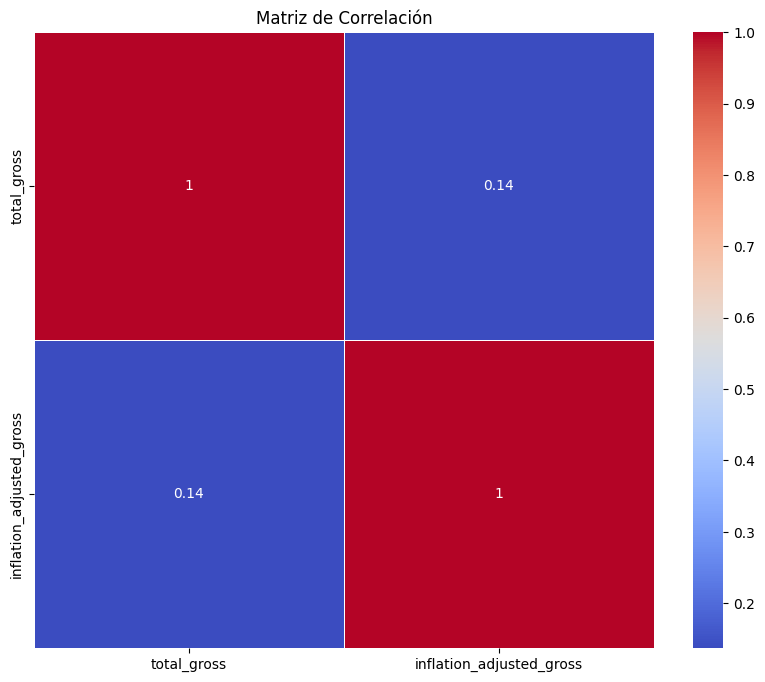

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que merged_all es tu DataFrame
# Si no lo has cargado previamente, aseg√∫rate de cargar tus datos primero

# Seleccionar solo las columnas num√©ricas
numeric_columns = merged_all.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlaci√≥n
correlation_matrix = numeric_columns.corr()

# Crear una figura y un eje para el gr√°fico
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlaci√≥n
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gr√°fico
plt.title('Matriz de Correlaci√≥n')
plt.show()



Resolving the Original Data Camp Notebook

Disclaimer: "inflation-adjusted gross" se refiere al ingreso bruto ajustado por la inflaci√≥n. En otras palabras, se trata del total de ingresos brutos generados por las pel√≠culas de Disney despu√©s de tener en cuenta el efecto de la inflaci√≥n en el valor del dinero a lo largo del tiempo. Esto significa que los ingresos se han ajustado para reflejar el valor actual del dinero, lo que permite comparar de manera m√°s precisa el desempe√±o financiero de las pel√≠culas de Disney a lo largo de los a√±os, teniendo en cuenta la variaci√≥n en el poder adquisitivo de la moneda.

1. Load data

In [15]:
import pandas as pd

# Read the file into gross
gross = pd.read_csv("../data/raw/disney_movies_total_gross.csv", parse_dates=['release_date'])

# Print out gross
gross.head()

import pandas as pd



movie_title release_date      genre MPAA_rating  \
0  Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                        Pinocchio   1940-02-09  Adventure           G   
2                         Fantasia   1940-11-13    Musical           G   
3                Song of the South   1946-11-12  Adventure           G   
4                       Cinderella   1950-02-15      Drama           G   

    total_gross inflation_adjusted_gross  
0  $184,925,485           $5,228,953,251  
1   $84,300,000           $2,188,229,052  
2   $83,320,000           $2,187,090,808  
3   $65,000,000           $1,078,510,579  
4   $85,000,000             $920,608,730

In [18]:
gross.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                         object
inflation_adjusted_gross            object
release_year                         int32
dtype: object

2. Top 10 movies

In [16]:
gross = gross.sort_values('inflation_adjusted_gross', ascending=False)

# Display the top 10 movies 
gross.head(10)

movie_title release_date      genre MPAA_rating  \
19                     Freaky Friday   1977-01-21     Comedy         NaN   
231              Up Close & Personal   1996-03-01      Drama       PG-13   
498  Prince of Persia: Sands of Time   2010-05-28     Action       PG-13   
324                  Mission to Mars   2000-03-10  Adventure          PG   
332                      Coyote Ugly   2000-08-04      Drama       PG-13   
321             Fantasia 2000 (IMAX)   2000-01-01    Musical           G   
319                 Bicentennial Man   1999-12-17      Drama          PG   
136      The Distinguished Gentleman   1992-12-04     Comedy           R   
172             D2: The Mighty Ducks   1994-03-25     Comedy          PG   
382                            Holes   2003-04-18      Drama          PG   

     total_gross inflation_adjusted_gross  
19   $25,942,000              $98,067,733  
231  $51,045,801              $97,356,578  
498  $90,759,676              $96,971,361  
324  $60,874,615              $95,208,344  
332  $60,786,269              $95,070,168  
321  $60,507,228              $94,852,354  
319  $58,220,776              $94,838,225  
136  $46,434,570              $94,349,900  
172  $45,604,206              $94,226,333  
382  $67,383,924              $94,203,395

3. Movie genre trend

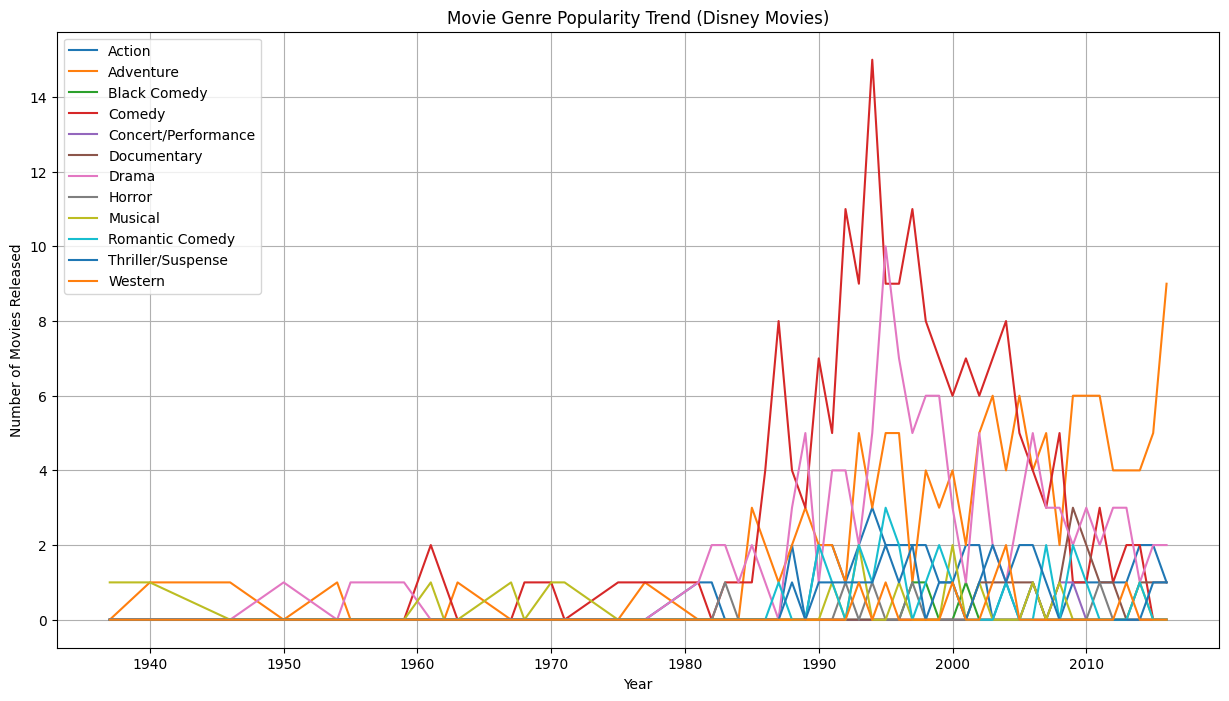

(                              movie_title release_date      genre MPAA_rating  \
 564  Star Wars Ep. VII: The Force Awakens   2015-12-18  Adventure       PG-13   
 524                          The Avengers   2012-05-04     Action       PG-13   
 578          Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   
 571                          Finding Dory   2016-06-17  Adventure          PG   
 558               Avengers: Age of Ultron   2015-05-01     Action       PG-13   
 441  Pirates of the Caribbean: Dead Man‚Äô‚Ä¶   2006-07-07  Adventure       PG-13   
 179                         The Lion King   1994-06-15  Adventure           G   
 499                           Toy Story 3   2010-06-18  Adventure           G   
 532                            Iron Man 3   2013-05-03     Action       PG-13   
 569            Captain America: Civil War   2016-05-06     Action       PG-13   
 
      total_gross  inflation_adjusted_gross  release_year  
 564  936662225.0               

In [20]:
# Converting 'release_date' to datetime and 'total_gross' and 'inflation_adjusted_gross' to numerical values
gross['release_date'] = pd.to_datetime(gross['release_date'])
gross['total_gross'] = gross['total_gross'].replace('[\$,]', '', regex=True).astype(float)
gross['inflation_adjusted_gross'] = gross['inflation_adjusted_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Top Ten Movies at the Box Office
top_ten_movies = gross.sort_values(by='total_gross', ascending=False).head(10)

# Calculate Movie Genre Trend
# Group by genre and year, then count the number of movies in each genre per year
genre_trend = gross.groupby([gross['release_date'].dt.year, 'genre']).size().unstack(fill_value=0)

# Visualize Genre Popularity Trend
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
for genre in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[genre], label=genre)

plt.title('Movie Genre Popularity Trend (Disney Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend()
plt.grid(True)
plt.show()

top_ten_movies, genre_trend.tail(10)  # Displaying the top ten movies and the last 10 years of genre trends


https://github.com/Munchkinland/Disney-Movies-and-Box-Office-Success/blob/main/DisneyOriginalDataCampNotebook.ipynb

La linea de endencia de la popularidad de varios g√©neros de pel√≠culas de Disney a lo largo del tiempo, muestra espec√≠ficamente desde la d√©cada de 1940 hasta m√°s all√° del a√±o 2010. Cada l√≠nea de color representa un g√©nero diferente y la altura de la l√≠nea en un a√±o dado indica la cantidad de pel√≠culas de ese g√©nero que se lanzaron en ese a√±o.

De una r√°pida ojeada, aqu√≠ hay algunas interpretaciones que se pueden hacer:

Drama: Este g√©nero muestra una tendencia general ascendente a lo largo del tiempo, con picos notables en varias ocasiones, lo que sugiere que Disney ha incrementado la producci√≥n de pel√≠culas de drama a lo largo de los a√±os.

Comedia: La comedia tambi√©n tiene una tendencia al alza, con algunos altibajos, pero en general muestra un crecimiento constante, indicando que es un g√©nero popular y constante en la producci√≥n de Disney.

Thriller/Suspense: Hay un pico significativo alrededor de los a√±os 80 y 90, pero en general, no parece ser un g√©nero tan frecuentemente producido como el drama o la comedia.

Musical: Los musicales tienen una presencia bastante consistente, con un pico notable alrededor de la d√©cada de 1960.

Acci√≥n y Aventura: Estos g√©neros tambi√©n muestran un aumento con el tiempo, pero no son tan predominantes como el drama o la comedia.

Romantic Comedy: La comedia rom√°ntica tiene picos espor√°dicos a lo largo del tiempo, sugiriendo que Disney produce este g√©nero en oleadas.

Western: Es el g√©nero menos producido seg√∫n este gr√°fico, con muy pocos t√≠tulos lanzados en comparaci√≥n con los otros g√©neros.

Horror: Al igual que el western, el g√©nero de horror no parece ser un enfoque principal para Disney, mostrando muy poca producci√≥n a lo largo del tiempo.

Black Comedy y Concert/Performance: Estos g√©neros son menos comunes en la producci√≥n de Disney y muestran solo una peque√±a cantidad de pel√≠culas lanzadas espor√°dicamente.

5. Data Transformation üëâ Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column.

For this dataset, there will be 11 dummy variables, one for each genre except the action genre which we will use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.

In [22]:
genre_dummies =  pd.get_dummies(gross['genre'], drop_first=True)

# Inspect genre_dummies
genre_dummies.head()

Adventure  Black Comedy  Comedy  Concert/Performance  Documentary  Drama  \
19       False         False    True                False        False  False   
231      False         False   False                False        False   True   
498      False         False   False                False        False  False   
324       True         False   False                False        False  False   
332      False         False   False                False        False   True   

     Horror  Musical  Romantic Comedy  Thriller/Suspense  Western  
19    False    False            False              False    False  
231   False    False            False              False    False  
498   False    False            False              False    False  
324   False    False            False              False    False  
332   False    False            False              False    False

6. Genre Effect üëâ Now that we have dummy variables, we can build a linear regression model to predict the adjusted gross using these dummy variables.

From the regression model, we can assess the impact of each genre by examining its coefficient measured in units of box office gross dollars. We will specifically focus on the influence of the action and adventure genres. (Please note that the intercept and the first coefficient correspond to the effect of the action and adventure genres, respectively). We anticipate that movies like "The Lion King" or "Star Wars" would perform better at the box office.

In [23]:
from sklearn.linear_model import LinearRegression

# Build a linear regression model
regr = LinearRegression()

# Fit regr to the dataset
regr.fit(genre_dummies, gross['inflation_adjusted_gross'])

# Get estimated intercept and coefficient values 
action =  regr.intercept_
adventure = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action, adventure))

(102921757.368421, 87475654.70909834)


7. Confidence intervals for regression parameters üëâ Primero, vamos a calcular unos rangos especiales llamados "intervalos de confianza al 95%". Imagina que estamos buscando un tesoro en un mapa, y estos intervalos nos ayudan a decir con confianza d√≥nde podr√≠a estar el tesoro.

El "intercepto" es como un punto de referencia en nuestro mapa, y los "coeficientes" son como las instrucciones que nos dicen hacia d√≥nde ir para encontrar el tesoro.

Cuando decimos que queremos un "intervalo de confianza al 95%" para el intercepto y los coeficientes, significa que estamos buscando un rango que tiene un 95% de probabilidad de contener el valor real del punto de referencia (intercepto) y de las instrucciones (coeficientes).

Si hay una relaci√≥n importante entre un g√©nero de pel√≠cula y los ingresos ajustados, entonces, al calcular estos rangos, esperamos que los rangos no incluyan el n√∫mero 0. Eso nos indicar√≠a que el g√©nero de pel√≠cula tiene un impacto significativo en los ingresos.

Finalmente, vamos a usar un m√©todo llamado "pares bootstrap" para calcular estos intervalos de confianza. Es como si hici√©ramos muchas copias de nuestro mapa, cada una con algunas modificaciones peque√±as, y luego calcul√°ramos los rangos en todas esas copias para tener una mejor idea de d√≥nde podr√≠a estar nuestro tesoro real.

In [24]:
import numpy as np

# Create an array of indices to sample from 
inds = np.arange(0, len(gross['genre']))

# Initialize 500 replicate arrays
size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)

8. Confidence intervals for regression parameters üëâ Despu√©s de preparar todo, vamos a hacer algo llamado "pair bootstrap" para estimar los par√°metros de nuestra regresi√≥n. Esto es como cuando queremos tener una idea de c√≥mo podr√≠a funcionar un plan, as√≠ que probamos muchas versiones ligeramente diferentes del mismo plan.

Lo que haremos exactamente es tomar datos que incluyen el g√©nero de las pel√≠culas y cu√°nto ganaron (ingresos ajustados). Luego, vamos a elegir algunos de estos datos al azar, pero manteniendo el g√©nero original de cada pel√≠cula. Una vez que tengamos estos datos, los convertiremos en variables ficticias (dummy variables), como mencionamos antes.

La idea detr√°s de todo esto es tratar de entender c√≥mo afecta el g√©nero de la pel√≠cula a los ingresos, pero lo hacemos probando diferentes combinaciones de pel√≠culas y g√©neros para obtener una imagen m√°s completa.

In [25]:
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds, len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_genre = gross['genre'][bs_inds] 
    bs_gross = gross['inflation_adjusted_gross'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies = pd.get_dummies(bs_genre, drop_first=True)
    
    # Build and fit a regression model 
    regr = LinearRegression().fit(bs_dummies, bs_gross)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]

9. Confidence intervals for regression parameters üëâ Al final, vamos a calcular unos rangos especiales llamados "intervalos de confianza al 95%" para el punto de referencia (intercepto) y para el coeficiente que estamos estudiando. Imagina que estos rangos son como una franja en un camino.

Si esa franja no incluye el n√∫mero 0, significa que es poco probable que el valor real sea 0. En otras palabras, si la franja no cubre el 0, entonces podemos concluir que hay una relaci√≥n importante entre el g√©nero de la pel√≠cula que estamos estudiando y los ingresos ajustados. Es como decir que hay una conexi√≥n real entre ellos. Pero si la franja s√≠ cubre el 0, entonces no podemos estar seguros de una relaci√≥n importante.

As√≠ que, en resumen, al mirar estos rangos especiales, podemos decidir si el g√©nero de la pel√≠cula tiene un efecto significativo en los ingresos ajustados o no.

In [26]:
confidence_interval_action = np.percentile(bs_action_reps, q=[2.5, 97.5])
confidence_interval_adventure = np.percentile(bs_adventure_reps, q=[2.5, 97.5])
    
# Inspect the confidence intervals
print(confidence_interval_action)
print(confidence_interval_adventure)

[7.07658972e+07 1.41823995e+08]
[2.91097464e+07 1.49117647e+08]


Calculating confidence intervals for two different variables (action and adventure) using bootstrapping. Here's what the code does:

It calculates the 95% confidence intervals for the action variable and the adventure variable using the np.percentile function.

The bs_action_reps and bs_adventure_reps variables are presumably arrays that contain resampled data generated through bootstrapping. These resampled datasets are used to estimate the confidence intervals.

The resulting confidence intervals are printed.

The confidence intervals you've obtained are as follows:

For the action variable: [7.07658972e+07, 1.41823995e+08]

This means that you are 95% confident that the true population parameter (e.g., mean or median) for the action variable falls within this interval.
For the adventure variable: [2.91097464e+07, 1.49117647e+08]

Similarly, this interval represents a 95% confidence interval for the true population parameter of the adventure variable.
In both cases, the confidence intervals are given as a range, with the lower and upper bounds. This information is useful for assessing the uncertainty in your estimates and understanding the potential range of values for the population parameters.